In [30]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [31]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [32]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [33]:
mat1 = material(1.33^2,1.0)
mat2 = material(epstable("gold"),1.0);

In [34]:
xC = (0.0,0.0)
a = 50.0
N = 20
m = 2

2

In [35]:
cyl = cylinder(a,N);

In [36]:
xmin,ymin = -200.0,-200.0
xmax,ymax = 200.0,200.0
Δx,Δy = 20.0,20.0

xA = collect(xmin:Δx:xmax)
yA = collect(ymin:Δy:ymax)
Xin,Xout,Yin,Yout = getMesh(xA,yA,cyl);

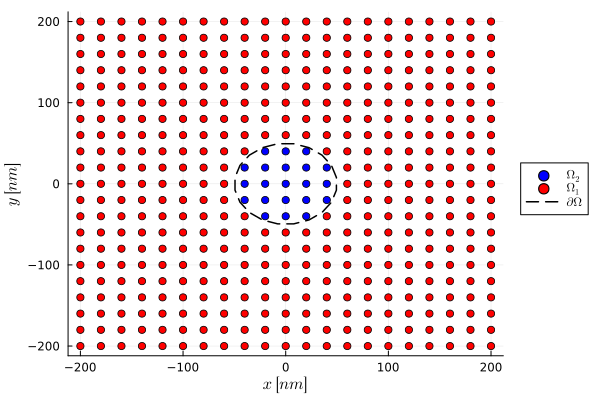

In [37]:
gr()
X,Y = getSurfPoints(cyl)
scatter(Xin,Yin,c=:blue,label=L"\Omega_2")
scatter!(Xout,Yout,c=:red,label=L"\Omega_1")
plot!(X,Y,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega",xlabel=L"x~[nm]",ylabel=L"y~[nm]",legend=:outerright)

In [38]:
dThr = 50.
m = 2

2

In [39]:
i = 1

k0 = 2π/520
n₁ = mat1.n(k0)
n₂ = mat2.n(k0)
r = 500.
α = -90.

-90.0

In [40]:
H,ϕ = getHϕ(m,cyl,k0,n₂,n₁,dThr,α);

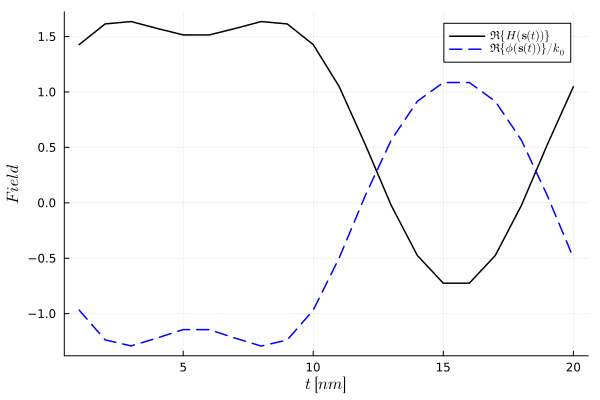

In [41]:
gr()
plot(real.(H[:,1]),c=:black,lw=1.5,label=L"\Re\{ H(\mathbf{s}(t)) \}")
plot!(real.(ϕ[:,1])./k0,c=:blue,lw=1.5,ls=:dash,label=L"\Re\{ \phi(\mathbf{s}(t)) \}/ k_0",xlabel=L"t~[nm]",ylabel=L"Field",legend=:topright)

# ========================================

## E

In [42]:
μ₀ = 1.25663706144e-6
ε₀ = 8.85418781762e-12


c1 = √(μ₀/ε₀)*(1/n₁)
c2 = √(μ₀/ε₀)*(1/n₂)
c2 = abs(c2)

174.4437024676377

In [43]:
Eout = getEfieldOutside(k0,n₁,m,dThr,cyl,Xout,Yout,α,H,ϕ);

In [44]:
Ein = getEfieldInside(k0,n₂,m,dThr,cyl,Xin,Yin,α,H,ϕ);

In [45]:
eff = [Xout Yout norm.(Eout)./c1;
        Xin Yin norm.(Ein)./c2];

In [46]:
ind = sortperm(eff[:,2])

ogrde = eff[ind,:]


ind2 = sortperm(ogrde[:,1])

ogrde2 = ogrde[ind2,:];

In [47]:
imagenE = reshape(ogrde2[:,3],(length(yA),length(xA)));

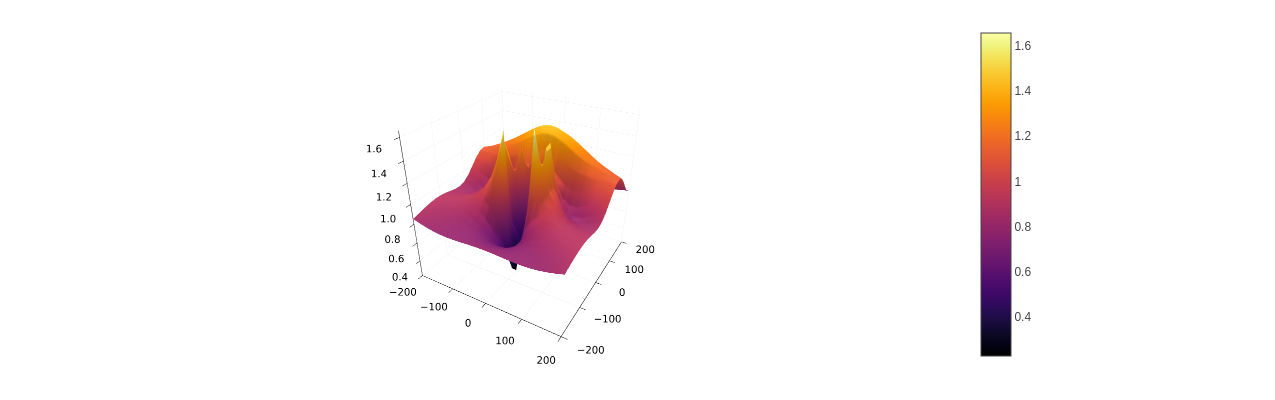

In [48]:
plotly()
surface(xA,yA,imagenE)

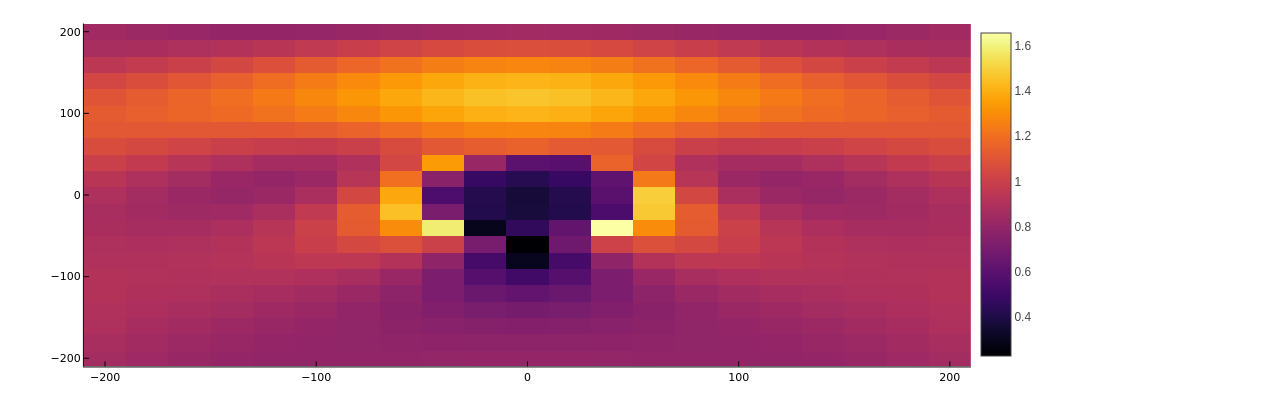

In [49]:
heatmap(xA,yA,imagenE)

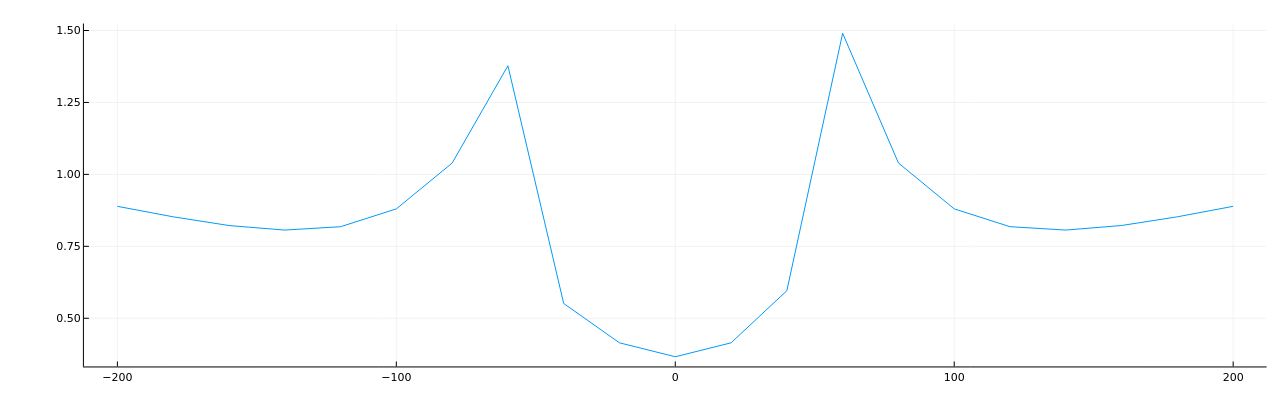

In [50]:
ind0 = findall(yA .== 0)[1]
plot(xA,imagenE[ind0,:],label="")

## H

In [51]:
HOut = getHfielOutsie(k0,n₁,m,dThr,cyl,Xout,Yout,α,H,ϕ);

In [52]:
HIn = getHfieldInside(k0,n₂,m,dThr,cyl,Xin,Yin,α,H,ϕ);

In [59]:
grd = [Xout Yout abs.(HOut);
        Xin Yin abs.(HIn)];


In [60]:
ind = sortperm(grd[:,2])

ogrd = grd[ind,:]


ind2 = sortperm(ogrd[:,1])

ogrd2 = ogrd[ind2,:];

In [61]:
imagenH = reshape(ogrd2[:,3],(length(yA),length(xA)));

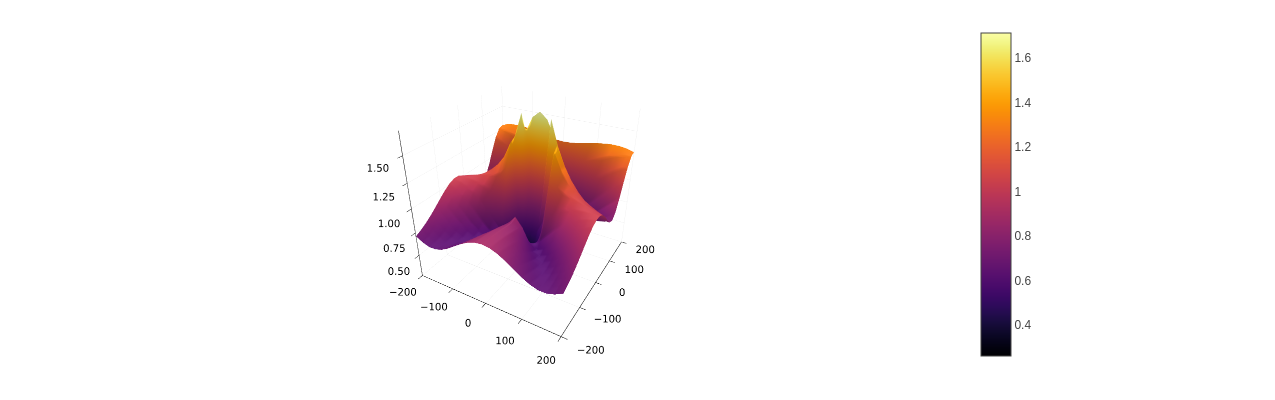

In [62]:
plotly()
surface(xA,yA,imagenH)

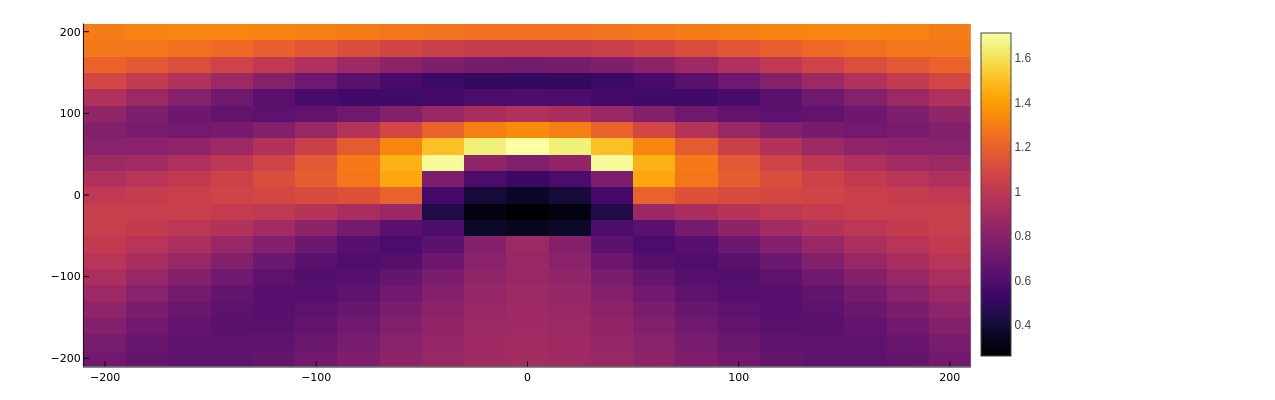

In [63]:
heatmap(xA,yA,imagenH)

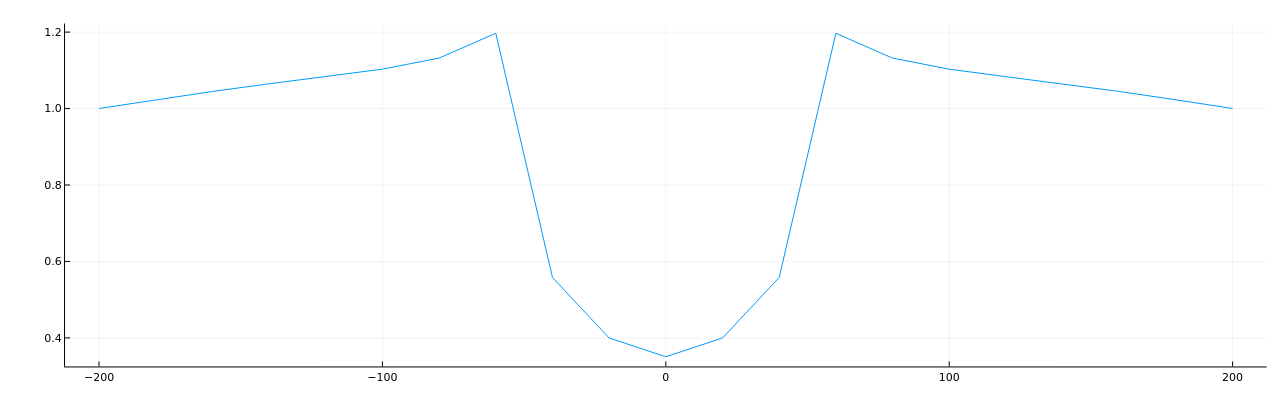

In [58]:
plot(xA,imagenH[ind0,:],label="")